  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc
Accuracy for 2 neighbours =  0.7803468208092486
Accuracy for 3 neighbours =  0.791907514450867
Accuracy for 4 neighbours =  0.8497109826589595
Accuracy for 5 neighbours =  0.8323699421965318
Accuracy for 6 neighbours =  0.8786127167630058
Accuracy for 7 neighbours =  0.9132947976878613
Accuracy for 8 neighbours =  0.9479768786127167
Accuracy for 9 neighbours =  0.8959537572254336
Accuracy for 10 neighbours =  0.9132947976878613
Accuracy for 11 neighbours =  0.8786127167630058
Accuracy for 12 neighbours =  0.8728323699421965
Highest accuracy is achieved with  8 neighbours
0.9479768786127167
Predicted classification:  unacc | Attributes' data:  (3, 1, 3, 1, 2, 2) | Actual classific

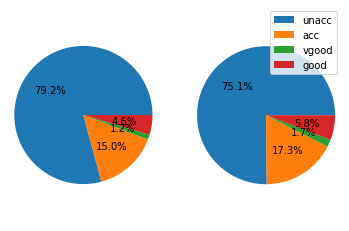

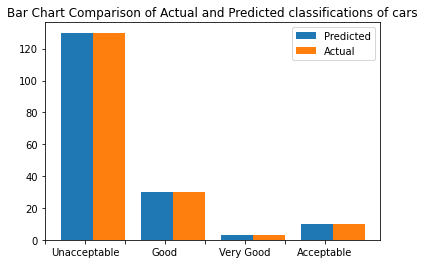

8


In [3]:
# ENT361-3 ml
# Course Project
# Author: Harsh Sawarkar,Ayush bante and Akshat Tambi

import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import collections
from sklearn import linear_model, preprocessing
from matplotlib import pyplot as plt

# first I read the data from the text file
cardata = pd.read_csv("car.data")
print(cardata.head())

# preprocessing encodes labels into appropriate integer values
object = preprocessing.LabelEncoder()
buying = object.fit_transform(list(cardata["buying"]))
maint = object.fit_transform(list(cardata["maint"]))
door = object.fit_transform(list(cardata["door"]))
persons = object.fit_transform(list(cardata["persons"]))
lug_boot = object.fit_transform(list(cardata["lug_boot"]))
safety = object.fit_transform(list(cardata["safety"]))
car_class = cardata['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

#this varable will be used later to predict classification of a car
predict = "class"

# car_class is my variable of interest
y = list(car_class)
# I use zip to connect lists from data file
X = list(zip(buying, maint, door, persons, lug_boot, safety))

# I train the algorithm on some sample size
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

# empty list of number of k neighbours
number_of_neighbours = []
accuracy_for_neighbours = []

# WE am running the model 11 times with different K-neighnour sizes to find the best one (usually it is either 7,
# or 8 or 9)
for i in range(2, 13):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, np.ravel(y_train))
    accuracy = model.score(x_test, y_test)
    number_of_neighbours.append(i)
    accuracy_for_neighbours.append(accuracy)
    print('Accuracy for', i, 'neighbours = ', accuracy)

highest_accuracy_number_of_neighbours = 2 + accuracy_for_neighbours.index([max(accuracy_for_neighbours)])
print('Highest accuracy is achieved with ', highest_accuracy_number_of_neighbours, 'neighbours')

# Using K neighbour classifier with the best number found before
model = KNeighborsClassifier(n_neighbors=highest_accuracy_number_of_neighbours)

model.fit(x_train, np.ravel(y_train))
accuracy = model.score(x_test, y_test)
print(accuracy)

predicted = model.predict(x_test)

# I change the values to the names from actual text file
names = cardata['class'].unique()

# Now I can check the predicted values of classifications of cars with actual classifications
for x in range(len(predicted)):
    print("Predicted classification: ", names[predicted[x]], "| Attributes' data: ", x_test[x],
          "| Actual classification: ", names[y_test[x]])
    n = model.kneighbors([x_test[x]], highest_accuracy_number_of_neighbours,
                         True)  # this line uses the highest accuracy number of neighnours

    print("N: ", n)

# preparing lists for graphs

chart_predicted_class = []
chart_actual_class = []

for x in range(len(predicted)):
    for i in range(4):
        if names[i] == names[predicted[x]]:
            chart_predicted_class.append(names[predicted[x]])
        if names[i] == names[y_test[x]]:
            chart_actual_class.append(names[y_test[x]])

chart_predicted_class_freq = []
chart_actual_class_freq = []

for name in names:
    chart_predicted_class_freq.append(chart_predicted_class.count(name))
    chart_actual_class_freq.append(chart_actual_class.count(name))

plt.subplot(1, 2, 1)
plt.pie(chart_predicted_class_freq, autopct='%0.1f%%')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(chart_actual_class_freq, autopct='%0.1f%%')
plt.axis('equal')
plt.legend(names)
plt.show()

bar = plt.subplot()
n = 1
t = 2
d = len(names)
w = 0.8
x_values = [t * element + w * n for element in range(d)]
predicted_x = x_values
plt.bar(predicted_x, chart_actual_class_freq)

n = 2
t = 2
d = len(names)
w = 0.8
x_values = [t * element + w * n for element in range(d)]
actual_x = x_values
plt.bar(actual_x, chart_actual_class_freq)
plt.legend(['Predicted', 'Actual'])
bar.set_xticks(range(8))
bar.set_xticklabels([' ', 'Unacceptable', ' ', 'Good', ' ', 'Very Good', ' ', 'Acceptable'])
plt.title("Bar Chart Comparison of Actual and Predicted classifications of cars")
plt.show()
print(highest_accuracy_number_of_neighbours)